In [23]:
import numpy as np 
import pandas as pd
import random
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [24]:
#download the train set and test set from mnist,length of train set is 60000,test set is 10000
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
# mnist_trainset = datasets.FashionMNIST(root='./data', train=True,transform=None)
# mnist_testset = datasets.FashionMNIST(root='./data', train=False,transform=None)

In [25]:
image_sample = []
label_sample=[]
def mnist_show(mnist_trainset,image_sample=image_sample,label_sample=label_sample,row=2,col=4):
    # we plot the image in a mxn matrix, default is 2X4in here
    # data in mnist has two variables-img data and label
    for i in range(0,row*col):
        img,label=mnist_trainset[i]
        image_sample.append(img)
        label_sample.append(label)
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(8, 4))
    #for ax, image, label in zip(axes, image_sample, label_sample):
    for i in range(0,row):
        for j in range(0,col):
            ax= axes[i][j]
            ax.set_axis_off()
            image=image_sample[i*col+j]
            label=label_sample[i*col+j]
            #ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
            ax.set_title('Training: %i' % label)
    plt.show()

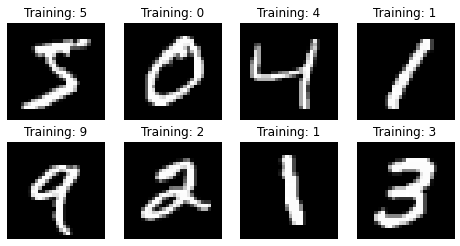

In [26]:
mnist_show(mnist_trainset)

In [27]:
def split_train_test(image_sample,train_X=[],train_y=[],test_X=[],test_y=[],train_size=10000,test_size=2000):
    #since 60000 data set might be too big, we may need to chunk them and improve the efficiency
    a =np.asarray(image_sample[0])#.reshape(-1)
    idx_train = [random.randint(0,len(mnist_trainset)-1) for _ in range(train_size)]
    idx_test = [random.randint(0,len(mnist_testset)-1) for _ in range(test_size)]
    for i in idx_train:
        img,label=mnist_trainset[i]
        train_X.append(np.asarray(img).reshape(-1))
        train_y.append(label)

    for i in idx_test:
        img,label=mnist_testset[i]
        test_X.append(np.asarray(img).ravel())
        test_y.append(label)
    train_X = np.asarray(train_X)
    test_X = np.asarray(test_X)
    return train_X,train_y,test_X,test_y

In [28]:
train_X,train_y,test_X,test_y = split_train_test(image_sample)

In [29]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [49]:
#choose the model you want
# clf = LogisticRegression() 
clf = tree.DecisionTreeClassifier()
# clf = svm.SVC()
# scl = StandardScaler()
# train_X = scl.fit_transform(train_X)
# test_X = scl.fit_transform(test_X)
# clf = lgb.LGBMClassifier()
# clf=make_pipeline(StandardScaler(), svm.SVC(kernel='rbf'))
def model_fitting(clf,train_X = train_X,train_y = train_y,test_X = test_X,test_y=test_y):
    clf.fit(train_X,train_y)
    pred = clf.predict(test_X)
    return pred
pred = model_fitting(clf)
result = classification_report(test_y,pred)
print(result)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       200
           1       0.92      0.96      0.94       224
           2       0.81      0.79      0.80       193
           3       0.77      0.71      0.74       211
           4       0.83      0.87      0.85       201
           5       0.74      0.74      0.74       181
           6       0.84      0.86      0.85       189
           7       0.84      0.83      0.83       221
           8       0.80      0.78      0.79       179
           9       0.76      0.76      0.76       201

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [50]:
pred_probas=clf.predict_proba(test_X)#we can see the prob when predict the outcome
print(pred_probas)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [51]:
import plotly.graph_objects as go
def error_analysis():
    yactual = np.asarray(test_y)

    fig=go.Figure()
    for i in range(10):
        items = pred[yactual==i] #
        correct = items[items==i]#
        err = items[items!=i]#
        fig.add_trace(go.Histogram(x=err,
                               nbinsx=10,name=f"error {i}",marker_color=i,opacity=0.5))
    fig.show()
    
error_analysis()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 6 0 0 0 0 5 0 0 0 0 0 0 0 0
 0 5 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 4 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 7 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 7 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 6 7 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1
 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 7 3 2 8 2 4 2 2 2 5 2 2 2 2 2 2 2 2 6 4 3 7 8 8 2 2 2 2